# ASSIGNMENT 2: Thomas Buckley #

#### DATA ACCESS DESIGN:

While studying design there were a range of different patterns I felt would be useful for this project. However, I had spent most time reading about the 'strategy' design pattern, so I chose to use it in my project. I think I understand the concepts of the pattern fairly well, but implementing it in code was challenging. I still have a lot to learn about design patterns.


**Why the Strategy Design Pattern?**

In the strategy design pattern, there are common interfaces that define what functionality or properties a class should have. Child classes are then developed from these interfaces (or 'parent classes') and implement the functionality in their own way. For example, if Interface A has function X, class B can call the X function on all child class instantiations of Interface A, without knowing what algorithm is being used in the function. 

This means that new subclasses can be made from the interface and run entirely different code, so long as the interface remains the same. That's why I chose to use this design pattern for defining common interfaces for the data layer. I am using CSV and JSON in this project, but in the future, a subclass of the interface that uses SQL could be made. I believe this satisfies the requirement of other data storage needing to be 'plugged in' in the future.

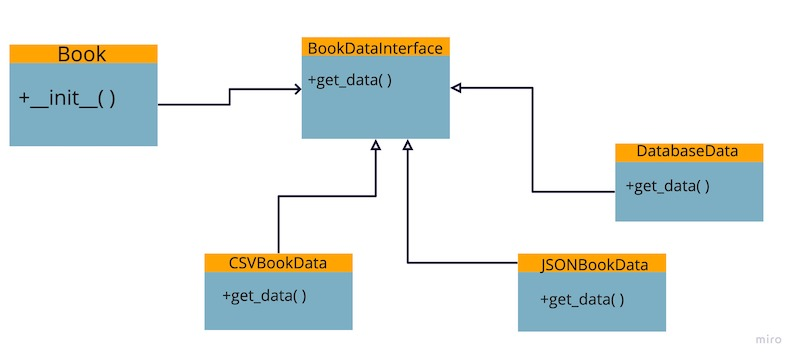


All of the data layer classes should inherit from the common interface (book data interface in the diagram) used by the program. This way, all the child data layer classes will contain the same methods, even though the code and functionality within them can be totally different. So long as each class returns data of the same type, there should be no problems. This results in some abstraction. For example, the Book class can call upon methods of the data layer class without any knowledge of the code is uses to return a value. Because the methods of the data layer classes are all the same and return the same data type, another data layer class that retrieves data from a different source (for example a database using SQL) can be easily passed or 'plugged in' to an instance of the book class.





#### NOTIFICATION SYSTEM DESIGN:

For the notification system I decided to follow the observer design pattern. A subject class is defined with methods such as add(for passing instances of a class) and notify(for telling those instances to do something). This subject class is the class that will be 'observed' or 'watched' by the instances of another class. Any class we want to have this observable quality can inherit from this subject class. In my program the Manager classes inherit from the subject class, as I want them to be the classes that will trigger notifications.  

Through the use of the add method, references to instances of observers(notification classes) are passed to the instantiation of the subject class's child classes. Whenever something happens in the program that I want the observer classes to respond to, I can call the notify method on each of the observer objects. When I instantiate each observer class, I can pass a reference to the object it should observe, this way it has access to the data inside that object so it can perform its functionality. 

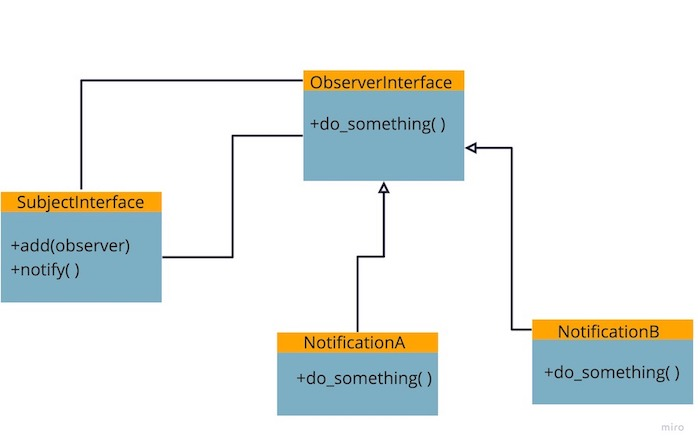


#### PLEASE RUN CODE BLOCKS ONE BY ONE TO ENSURE PROGRAM WORKS CORRECTLY

In [630]:

# First I import any modules I will use in this program. 
import csv 
import json
import datetime


#########################################################
####       INTERFACES FOR OBSERVABLE CLASSES         ####
#########################################################

# This is the parent class for any class I wish to be 'observed'
# instances of obervers are passed through add method and appends them to a list
# notify uses a for loop to call check data on each instance in the list.

class SubjectInterface():
    observers = []
    def add(self,observer_object):
        self.observers.append(observer_object)
    def notify(self):
        for observer in self.observers:
            observer.check_data()
    

    
#########################################################
####        INTERFACES FOR OBSERVER CLASSES          ####
#########################################################

# Notification classes must have the check_data method that will be called from within the subject class
# depending on the outcome of the check_data method, send will be called

class NotificationInterface():
    def send():
        pass
    def check_data():
        pass
    
    
#########################################################
### DEFINE COMMON BEHAVIOUR INTERFACES FOR DATA LAYER ###
#########################################################

# These are the parent classes for the data access layer classes.
# Methods defined here will be common amongst all child classes.
# Different functionality can be put into child classes within each method.
# This allows new functionality to be 'plugged in'

# I read breifly about abstract classes and methods. But I didn't have enough time to learn more about them. 

    
class MemberDataI():
    def get_member():
        pass
    def get_all_members():
        pass
    def add_members():
        pass
    
class BookDataI():
    def get_book():
        pass
    
class ApplicationDataI:
    def create_application():
        pass
    def print_cards():
        pass
    
class LoanDataI():
    def get_loan_info():
        pass
    def new_loan():
        pass
    
class ReturnDataI():
    def update_loan_info():
        pass 
    
class ReserveDataI():
    def make_reservation():
        pass
    def get_reservation():
        pass
    def update_reservation():
        pass





##################################################
###       CONCRETE MEMBER DATA CLASSES         ###
##################################################


### CLASS TO GET MEMBER DATA FROM CSV FILE ###
class CSVMemberData(MemberDataI):
    def get_all_members(self):
        try:
            with open('members.csv', encoding='utf-8-sig') as f:
                data = csv.DictReader(f)
                members = []
                
            # This gives keys in camelCase or with spaces. Python convention is to use snake case..
            # So I set the keys manually, maybe I could use a regex to do this.
            # I want to keep all data coming into the Book, Member, and Manager classes a consistent format 
            
                for row in data:
                    members.append({
                            'ID': int(row['ID']),
                            'first_name': row['First Name'],
                            'last_name': row['Last Name'],
                            'gender': row['Gender'],
                            'email': row['Email'],
                            'card_number': int(row['CardNumber'])
                        })
                return members
        except:
            pass #DO SOMETHING HERE TO HANDLE AN ERROR
        
        
    def get_member(self, member_id):
        try:
            with open('members.csv', encoding='utf-8-sig') as f:
                reader = csv.DictReader(f)
                for row in reader:
                    if row['ID'] == str(member_id):
                        return {
                            'ID': int(row['ID']),
                            'first_name': row['First Name'],
                            'last_name': row['Last Name'],
                            'gender': row['Gender'],
                            'email': row['Email'],
                            'card_number': int(row['CardNumber'])
                        }
        except: #DO SOMETHING HERE TO HANDLE AN ERROR
            print("something went wrong")
            return False
        
        
    def add_members(self, data):
        try:
            # use 'a' for append
            # SHOULD I FEED CONSISTENT DATA INTO THE CLASS. HOW DO I KNOW WHAT DATA TYPE COULD COME INTO HERE?
            # How to control if the data coming in isnt formatted the correct way?
            # Would this be a use for the adapter pattern?
            
            with open('members.csv', 'a') as f:
                writer = csv.writer(f)
                for row in data:
                    writer.writerow([
                        row['ID'], 
                        row['first_name'], 
                        row['last_name'], 
                        row['gender'], 
                        row['email'], 
                        row['card_number']
                    ])
                    print(row['first_name'], "was added to members.csv file")
        except:
            pass
        

### CLASS TO READ MEMBER DATA FROM JSON FILE 
###  **THIS IS JUST AN EXAMPLE TO SHOW THE 'PLUGGABLE' FUNCTIONALITY. IT IS NOT USED IN MY PROGRAM.
class JSONMemberData(MemberDataI):
    def get_all_members():
        pass
    def get_member(self, member_id):
        try:
            with open('members.json') as json_file:
                data = json.load(json_file)
                for row in data:
                    if(row["ID"] == str(member_id)):
                        return {
                            'ID': int(row['ID']),
                            'first_name': row['First Name'],
                            'last_name': row['Last Name'],
                            'gender': row['Gender'],
                            'email': row['Email'],
                            'card_number': int(row['CardNumber'])
                        }
        except:
            pass
    def add_members():
        pass
    
    
############################################
#####   CONCRETE BOOK DATA CLASSES    ######
############################################
class CSVBookData(BookDataI):
    def get_book(self, book_id):
        try:
            with open('books.csv', encoding='utf-8-sig') as f:
                reader = csv.DictReader(f)
                for row in reader:
                    if row['Number'] == str(book_id): 
                        
                        # Like the member class, I will format it how I want it.
                        
                        return {
                            'ID': int(row['Number']),
                            'title': row['Title'],
                            'author': row['Author'],
                            'genre': row['Genre'],
                            'sub_genre': row['SubGenre'],
                            'publisher': row['Publisher'],
                        }
        except:
            pass # DO SOMETHING TO HANDLE THE ERROR
        
    
    
    
############################################
#####   CONCRETE LOAN DATA CLASSES    ######
############################################

class CSVLoanData(LoanDataI):
    
    #  ALLOW LOAN SEARCHING BY THE BOOK ID
    
    #  I USE THE TIME STAMP CODE A LOT, MAYBE I SHOULD DEVELOP IT INTO A FUNCTION OR CLASS?

    def get_loan_info(self, book_id):
        data = False
        try:
            with open('bookloans.csv', encoding='utf-8-sig') as f:
                reader = csv.reader(f)
                for row in reader:
                    
                    # IF INDEX 3 IS 0, THE BOOK HASN'T BEEN RETURNED YET.
                    
                    if row[0] == str(book_id) and row[3] == '0':
                        data = row
                        return data
            return data
        except: 
            pass
        
        
    def new_loan(self, book_id, member_id):
    
        try:
            time_stamp = (datetime.datetime.utcnow() - datetime.datetime(1900,1,1)).days
            new_data = [book_id, member_id, time_stamp, '0']
            
            # use 'a' for append
            # The problem here is that it appends row to end of file. 
            # The rest of the loan data is sorted by the ID of the book.
            # I could pull all data, store in memory, sort by book ID and then rewrite to CSV File.
            
            with open('bookloans.csv', 'a') as f:
                writer = csv.writer(f)
                writer.writerow(new_data)
                return new_data
        except:
            pass
        
        
        
##############################################
#####   CONCRETE RETURN DATA CLASSES    ######
##############################################

class CSVReturnData(ReturnDataI):
    
    # THERE IS NO WAY TO EDIT VALUES IN CSV FILE, SO I EDIT DATA IN MEMORY AND REWRITE TO THE SAME FILE
    # This method will find the 0 value and update it to todays timestamp
    def update_loan_info(self, book_id):
        try:
            updated_row = None
            time_stamp = (datetime.datetime.utcnow() - datetime.datetime(1900,1,1)).days
            loan_data = []
            with open('bookloans.csv', encoding='utf-8-sig') as f:
                reader = csv.reader(f)
                for row in reader:
                    if (row[0] == str(book_id) and row[3] == '0'):
                        row[3] = time_stamp 
                        updated_row = row
                        
                    loan_data.append(row)
            if(loan_data):
                with open('bookloans.csv', 'w') as f:
                    writer = csv.writer(f)
                    writer.writerows(loan_data)
                    return updated_row
        except:
            pass
    


        
### EXAMPLE CLASS TO GET DATA FROM DATABASE USING SQL ###
class SQLBookData(BookDataI):
    '''
    Example of a different type of data access class.
    Functionality could be added here to retrieve data from other source(database)
    Fuction names are the same, so the client class(Book) will be able to use it like the CSV class.
    '''
    def get_book():
        pass
    
    
    
########################################
###   CONCRETE RESERVATION CLASSES   ###
########################################
class JSONReserveData(ReserveDataI):
    def __init__(self):
        try:
            with open('reservations.json', 'r') as json_file:
                self.data = json.load(json_file)
        except:
            pass # DO SOMETHING TO HANDLE ERROR
    
    def make_reservation(self, book_id, member_id):       
        reserve_data = False
        for row in self.data: 
            # CHECK THE MEMBER HASN'T ALREADY RESERVED THIS BOOK.
            if row["book_id"] == book_id and row["member_id"] == member_id: 
                print("You have already reserved this book.")
                return False
        reserve_data = {
            "book_id": book_id,
            "member_id": member_id,
            "date": (datetime.datetime.utcnow() - datetime.datetime(1900,1,1)).days
        }
        self.data.append(reserve_data)
        try:
            with open('reservations.json', 'w') as json_file:
                json.dump(self.data, json_file)
            return reserve_data
        except:
            pass # DO SOMETHING TO HANDLE ERROR
        

            
#########################################
###   CONCRETE APPLICATION CLASSES    ###
#########################################

class JSONApplicationData(ApplicationDataI):
    def __init__(self):
        try:
            with open('applications.json', 'r') as json_file:
                self.data = json.load(json_file)
        except:
            pass

    def create_application(self, first_name, last_name, gender, email):
        applicant_data = False
        
        # CHECK THE EMAIL ISN'T ALREADY A MEMBER OR AWAITING MEMBERSHIP
        for row in self.data: 
            if row["email"] == email:
                print("Email already on waiting list")
                return False

        # CREATE OBJECT
        # APPEND TO DATA
        # WRITE TO FILE
        applicant_data = {
            "first_name": first_name,
            "last_name": last_name,
            "gender": gender,
            "email": email,
            "date": (datetime.datetime.utcnow() - datetime.datetime(1900,1,1)).days
        }
        self.data.append(applicant_data)
        try:
            with open('applications.json', 'w') as json_file:
                json.dump(self.data, json_file)
            return applicant_data
        except:
            return False
        
        
    def print_cards(self, member_count):
        # GET THE ID OF LAST MEMBER AND INCREMENT COUNT FOR EACH SUCCEEDING MEMBER
        # THIS WILL HELP TO KEEP NUMBERS UNIQUE
        count = member_count + 1
        for val in self.data:
            val['ID'] = count
            val['card_number'] = int(str(count) + str(1))
            count+=1
            print(val['first_name'], " card number is:", val['card_number'])
        return self.data
        # GOING FURTHER I COULD DO SOMETHING HERE TO CLEAR OUT THE APPLICATS FILE, NOW THAT THEY'RE MEMBERS
                
            
                

#############################
### DEFINE OTHER CLASSES  ###
#############################
    
class Member():
    '''
    MEMBER PRECONDITIONS:
        1 - member_interface is an instantiation of a child class of memberDataI
        2 - member ID can be a str or int (it will be converted to int in MemberData child class).
        3 - member_interface.get_member should return a dictionary for setting arrtibutes of the object. 
    ''' 
    # CALL TO DATA LAYER OBJECT IN INIT METHOD TO CREATE MEMBER.
    def __init__(self, member_interface, member_id):
        self.member_interface = member_interface()
        self.info = self.member_interface.get_member(member_id)
        
        # SET MEMBER ATTRIBUTES FROM THE DICTIONARY RETURNED FROM DATA LAYER OBJECT
        if( type(self.info) == dict ):
            for key in self.info:
                setattr(self, key, self.info[key])
        else:
            raise Exception("No member information")
        
    def __str__(self):
        return # return a string representation of the obj here
    
    def scan(self): # SCAN FUNCTION TO RETURN ID. WILL USE THIS WHEN CALLING METHODS OF OTHER CLASSES
        return self.info['ID']

    
class Book():
    '''
    BOOK PRECONDITIONS:
        1 - book_interface is an instantiation of a child class of BookDataI
        2 - book ID can be a str or int (it will be converted to int in BookData child class).
        3 - book_interface.get_book should return a dictionary for setting arrtibutes of the object. 
    ''' 
    def __init__(self, book_interface, book_id): 
        self.book_interface = book_interface()
        self.info = self.book_interface.get_book(book_id)
        
        # SET MEMBER ATTRIBUTES FROM THE DICTIONARY RETURNED FROM DATA LAYER OBJECT
        if( type(self.info) == dict ):
            for key in self.info:
                setattr(self, key, self.info[key])
        else:
            pass
    def scan(self):
        return self.ID  # SCAN FUNCTION TO RETURN ID.
    
    
    
###############################################
###    LIBRARY MANAGEMENT SYSTEM CLASSES    ###
###############################################

class MembershipManager(SubjectInterface):
    '''
        Membership Manager should be passed the appropriate strategy classes on instantiation
        Certain data that is used by notification classes should be stored in an attribute for easy access
    '''
    
    # CLASSES PASSED TO THE MANAGER ARE INSTANTIATED IN INIT METHOD
    
    def __init__(self, member_strategy, app_strategy, print_strategy):
        self.member_strategy = member_strategy()
        self.members = self.member_strategy.get_all_members()
        self.app_strategy = app_strategy()
        self.print_strategy = print_strategy()
        self.last_applicant = None # A SORT OF 'STATE' ATTRIBUTE USED BY NOTIFICATION CLASS.
        
    #CHANGE TO ACCEPT A DICTIONARY?
    def apply_membership(self, first_name, last_name, gender, email):
        for val in self.members: # CHECK NOT ALREADY A MEMBER
            if( val['email'] == email):
                print("Email already registered")
                return
        self.last_applicant = self.app_strategy.create_application(first_name, last_name, gender, email)
        if (self.last_applicant):
            print("application for", first_name, last_name, "was submitted")
            # IN FUTURE I COULD CALL NOTIFY HERE TO ALERT NEW MEMBERS THEIR CARDS ARE READY
        
    def print_cards(self):
        # PASS THE LAST MEMBERS ID TO INCREMENT NEW IDs
        application_data = self.print_strategy.print_cards(self.members[len(self.members)-1]['ID'])
        self.member_strategy.add_members(application_data)
        
        

class LoansManager(SubjectInterface):
    '''
        Loans Manager should be passed the appropriate strategy classes on instantiation
        Certain data that is used by notification classes should be stored in an attribute for easy access
    '''
    def __init__(self, res_strategy, return_strategy, loan_strategy):
        self.res_strategy = res_strategy()
        self.return_strategy = return_strategy()
        self.loan_strategy = loan_strategy()
        self.current_book = None
        self.last_return = None # 'STATE' ATTRIBUTES HERE USED BY NOTIFICATION CLASS
        self.last_loan = None
        self.last_reservation = None
      
    def reserve_book(self, book_id, member_id, ):
        self.loan_data = self.loan_strategy.get_loan_info(book_id)
        if(self.loan_data):
            self.last_reservation = self.res_strategy.make_reservation(book_id, member_id)
            if self.last_reservation:
                print("Book ID:", book_id, "was reserved by member ID:", member_id)
        else:
            print('this book isn\'t currently on loan. Would you like to loan it?')
            return 
        
        
    def return_book(self, book_id):
        self.current_book = book_id
        self.loan_data = self.loan_strategy.get_loan_info(book_id) 
        if(self.loan_data): # FIRST CHECK LOAN EXISTS
            self.last_return = self.return_strategy.update_loan_info(book_id)
            print("Book ID:", self.last_return[0], "was returned." )
            self.notify()
        else:
            print('Book ID:', book_id, 'isn\'t currently on loan. Would you like to loan it?')
            return 

    def loan_book(self, book_id, member_id):
        self.current_book = book_id
        self.loan_data = self.loan_strategy.get_loan_info(book_id)
        # FIRST, CHECK IF BOOK IS AVAILABLE
        if self.loan_data:
            print('Book ID:', book_id, "is unavailable. Try reserving it.")
            # if yes, run reserve function
            
        # IF AVAILABLE, CALL CREATE LOAN FUNCTION
        else:
            self.last_loan = self.loan_strategy.new_loan(book_id, member_id)
            print("Book ID:", self.last_loan[0], "was loaned.")
            
        

class ReserveNotification(NotificationInterface):
    def __init__(self, observed_object):
        self.observed_object = observed_object 
    def send(self, book_id, member_id):
        print("Email to member", member_id, ": book id:", book_id, " is now available.")
    def check_data(self):
        try:
            with open('reservations.json', 'r') as json_file: #open & load the reservation data
                data = json.load(json_file)
                for val in sorted(data, key = lambda i: i['date']): #sort to get first in line for book
                    if val['book_id'] == self.observed_object.current_book:
                        self.send(val['book_id'], val['member_id']) # if someone is waiting for book, call send
        except:
            pass 
        
class LateReturnNotification(NotificationInterface):
    def __init__(self, observed_object):
        self.observed_object = observed_object 
    def send(self, loan_time, member_id):
        print("Email to member id:", member_id, " your loan is late by", loan_time - 14, "days. Please pay fine")
    def check_data(self):
        loan = self.observed_object.last_return
        loan_time = int(loan[3]) - int(loan[2])
        if loan_time > 14:
            self.send(loan_time, loan[1])

        
        
class NewBookNotification(NotificationInterface):
    def __init__(self, observed_object):
        self.observed_object = observed_object
    def send(self):
        print("Email to member who requested the new book.")
    def check_data(self):
        pass
    

### TESTING: BOOK & MEMBER CLASSES ###
1. instantiate book & member classes.
2. call the scan() method of both classes.
3. try to instatiate book & member classes with a none existent ID.
4. try to instantiate book & member classes with wrong parameter types.

In [631]:
# INSTANTIATE BOOK & MEMBER CLASSES

member1 = Member(CSVMemberData, 10)
book1 = Book(CSVBookData, 3)


# SCAN METHODS OF BOOK & MEMBER

print("ID of member:", member1.scan())
print("ID of book:", book1.scan())

# NON EXISTENT IDs
try:
    member2 = Member(CSVMemberData, 999)   # NONE EXISTENT ID RETURNS ERROR
except Exception as e: 
    print(e)  # CATCH IT IN AN EXCEPTION & DO SOMETHING HERE TO FIX IT



ID of member: 10
ID of book: 3
No member information


### TESTING: LOAN MANAGER CLASS ###

**Instantiate classes**

Pass the different strategy classes that we want to use with this instance as arguments. In this case I will be using JSON for reservations, CSV for loans and returns.

**Loaning a Book**


**Returning a Book**


**Reserving a Book**


In [632]:

loan_manager = LoansManager(JSONReserveData, CSVReturnData, CSVLoanData)

# LOAN AN AVAILABLE BOOK.
loan_manager.loan_book(book1.scan(), member1.scan())

# LOAN AN UNAVAILABLE BOOK.
member3 = Member(CSVMemberData, 65)
loan_manager.loan_book(book1.scan(), member3.scan())

# RETURN A BOOK
loan_manager.return_book(book1.scan())

# TRY TO RETURN A BOOK THAT ISN'T CURRENTLY ON LOAN
book2 = Book(CSVBookData, 1)
loan_manager.return_book(book2.scan())

# MEMBER RESERVES A BOOK
loan_manager.loan_book(book1.scan(), member3.scan())
loan_manager.reserve_book(book1.scan(), member1.scan())

# MEMBER TRIES RESERVING A BOOK TWICE
loan_manager.reserve_book(book1.scan(), member1.scan())




Book ID: 3 was loaned.
Book ID: 3 is unavailable. Try reserving it.
Book ID: 3 was returned.
Book ID: 1 isn't currently on loan. Would you like to loan it?
Book ID: 3 was loaned.
Book ID: 3 was reserved by member ID: 10
You have already reserved this book.


### TESTING: MEMBERSHIP MANAGER CLASS ###

**Instantiate Class**

**Apply for Membership**


In [633]:
member_manager = MembershipManager(CSVMemberData, JSONApplicationData, JSONApplicationData)

# APPLY FOR MEMBERSHIP
member_manager.apply_membership("Snow", "White", "Female", "snowwhite@gmail.com")

# TRY APPLYING FOR MEMBERSHIP TWICE
member_manager.apply_membership("Snow", "White", "Female", "snowwhite@gmail.com")

# REGISTERED MEMBER TRIES APPLYING FOR MEMBERSHIP
member_manager.apply_membership("Adelaide", "Cunningham", "Female", "a.cunningham@randatmail.com" )


application for Snow White was submitted
Email already on waiting list
Email already registered


**Print Cards**

This function will take the applicants in the applications file and fullfill the card number format requirement. 

The members file will then be updated with the information of the new members.

In [634]:
# PRINT CARD FOR APPLICANTS
member_manager.print_cards()

# APPLICANTS ARE THEN ADDED TO MEMBERS FILE



Thomas  card number is: 2011
Hannah  card number is: 2021
Jun  card number is: 2031
Kiung  card number is: 2041
Andrew  card number is: 2051
Heather  card number is: 2061
Jasmine  card number is: 2071
Thomas was added to members.csv file
Hannah was added to members.csv file
Jun was added to members.csv file
Kiung was added to members.csv file
Andrew was added to members.csv file
Heather was added to members.csv file
Jasmine was added to members.csv file


### TESTING: NOTIFICATIONS ###

**Instantiate Notification Classes**

**1 - Notification that a reserved book had become available**

**2 - Notification that an ordered book had become available**

**3 - Notification that a book return was late and of a resultant fine**

In [636]:
#INSTANTIATE CLASSES
reserve_notification = ReserveNotification(loan_manager) #pass the observed objects to instantiation
newbook_notification = NewBookNotification(loan_manager)
late_notification = LateReturnNotification(loan_manager)


#ADD THE NOTIFICATIONS (OBSERVERS TO THE OBSERVED(SUBJECT))
loan_manager.add(reserve_notification)
loan_manager.add(newbook_notification)
loan_manager.add(late_notification)


########### RESERVE NOTIFICATION TESTING #############

# CREATE TWO MEMBERS & A BOOK
member4 = Member(CSVMemberData, 99)
member5 = Member(CSVMemberData, 100)

book3 = Book(CSVBookData, 98)

# ONE MEMBER LOANS BOOK
loan_manager.loan_book(book3.scan(), member4.scan())

# NEXT MEMBER TRIES TO LOAN, THEN RESERVES
loan_manager.loan_book(book3.scan(), member5.scan())
loan_manager.reserve_book(book3.scan(), member5.scan())

# FIRST MEMBER RETURNS BOOK & NOTIFICATION IS SENT
loan_manager.return_book(book3.scan())



############## LATE RETURN NOTIFICATION TESTING ###########

# MEMBER WHO LOANED BOOK MORE THAN 14 DAYS AGO RETURNS BOOK
# for testing I will just pass a book ID here

loan_manager.return_book(106)



############## NEW BOOK NOTIFICATION TESTING ###########

# I have not added functionality for new books, since this was not specified to do so
# I have crated the notification class though, and will explain how it works:



Book ID: 98 was loaned.
Book ID: 98 is unavailable. Try reserving it.
You have already reserved this book.
Book ID: 98 was returned.
Email to member 100 : book id: 98  is now available.
Email to member 100 : book id: 98  is now available.
Book ID: 138 was returned.
Email to member id: 119  your loan is late by 655 days. Please pay fine
Email to member id: 119  your loan is late by 655 days. Please pay fine
